# Heart rate detection example codes
Hardware 1 - Orientation to Health Technology<br>
Joni Heikkilä, 8.9.2024<br>
Metropolia University of Applied Sciences<br>

## Introduction
This notebooks shows how to read in the example data and show graphically the PPG signal.

## Installation
Remove the comment and run the installation code, if needed.

In [36]:
# %pip install numpy matplotlib heartpy


## Setup
Read in the necessary modules.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## Read data
The following code reads the data into a numpy array named `data` and creates a time vector, so we can plot the data.

In [38]:
# Reads the file into a numpy array
data = hp.get_data('capture01_250Hz.txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs

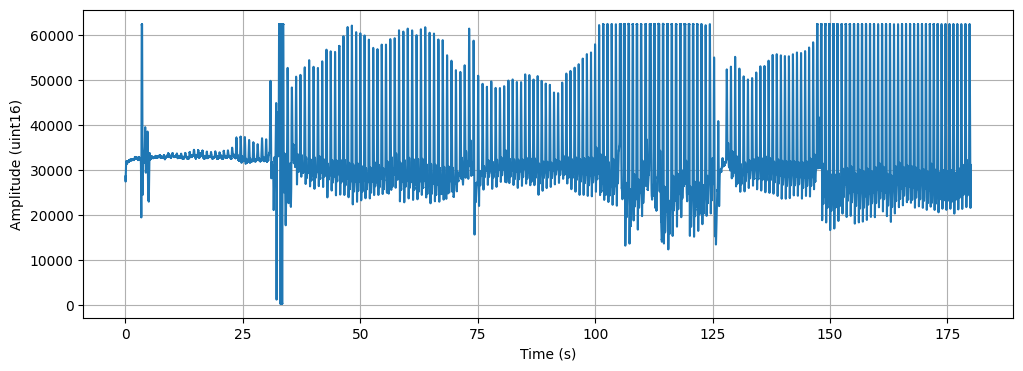

In [39]:
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## Data segment
Select randomly a 60 second data segment.

Segment starts from: 81 s


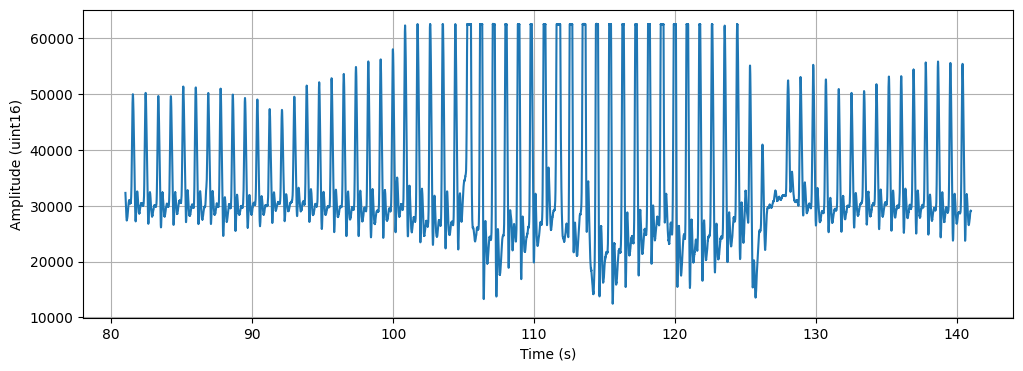

In [40]:
# Random seed based on the last four digits of the student ID number
np.random.seed(1305)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()


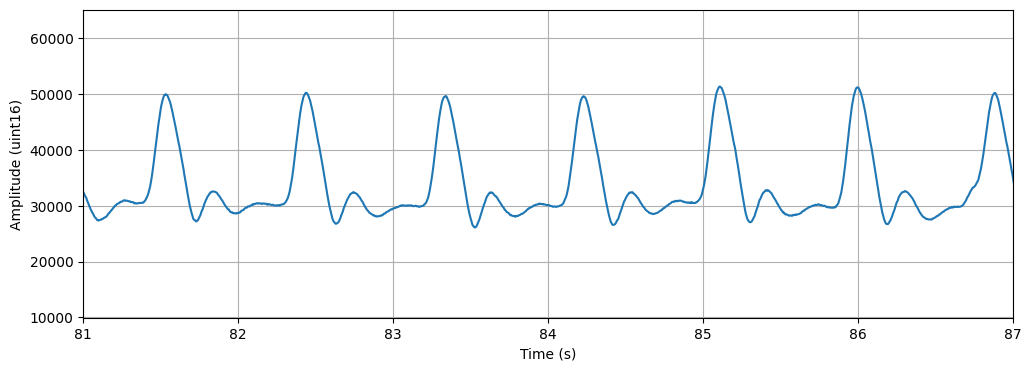

In [41]:
# Zoom in to the first 6 seconds to show the details of the signal

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.xlim(t0, t0 + 6)
plt.show()

## Peak detection and HRV measurements

Study the example codes found in heartpy’s documentation [Analysing a PPG signal](https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/1_regular_PPG/Analysing_a_PPG_signal.ipynb) and [Plotting results](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/quickstart.html#plotting-results) to process the selected data segment and show the peak detection and HRV measurements results.

bpm: 67.420266
ibi: 889.940120
sdnn: 41.688566
sdsd: 30.824430
rmssd: 38.945613
pnn20: 0.331288
pnn50: 0.141104
hr_mad: 24.000000
sd1: 27.538510
sd2: 47.626648
s: 4120.409032
sd1/sd2: 0.578216
breathingrate: 0.233333


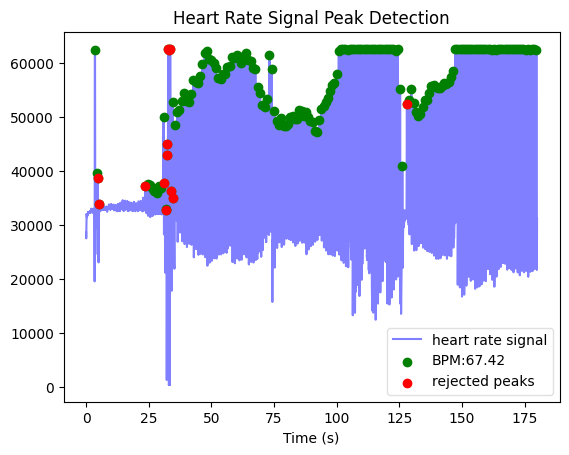

In [42]:
data = hp.get_data('capture01_250Hz.txt')
working_data, measures = hp.process(data, 250.0)
hp.plotter(working_data, measures)
wd, m = hp.process(data, sample_rate = 250.0)
for measure in m.keys():
    print('%s: %f' % (measure, m[measure]))


<h1>Interpret<h1>

1. What was the average heart rate? Was it low or high?
 - The average HR was 67 BPM and its little above average which was 64.9.

2. What was the average inter-beat-interval? Was it low or high?
 - The average IBI was 889ms and its little less than average when compare to the average 45-54 year old man which average is 923. 

3. How much variation is in the inter-beat-intervals? Which variation measure would you use? Why? Was that value low or high?
 - The SDNN was 41.6 and that is what I would use to measure the variation because it measures both short-term and long-term variations. The value is high compare to the average 45-54 year old man which average is 23.0. 

4. Based on these: How would you interpret the recovery and stress level of the person studied?
 - The SD1 and SD2 ratio is above average and HR is allmost average so i would say stess level is high performer. High RMSSD,SDNN and SDSD indicates good HR variability and the low stress indicates the recovery is high performers.
